## Demonstration sample and functions

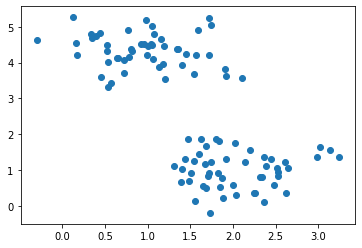

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
X, y = make_blobs(n_samples=100, centers=2,cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
testSample = pd.DataFrame({'x':X[:, 0],'y':X[:, 1]})

In [3]:
def initialCentroid(df):
    k = 2 
    x, y = df['x'], df['y']
    centroid = {i+1:[np.random.randint(min(x),max(x)),np.random.randint(min(y),max(y))] for i in range(k)}
    return centroid

def updateCenter(df, centroids):
    for key in centroids.keys():
        centroids[key][0] = np.mean(df[df['closestCentroid'] == key]['x'])
        centroids[key][1] = np.mean(df[df['closestCentroid'] == key]['y'])
        return centroids


def findingCentroid(df, centroids, counter,k=2):
    counter += 1 #Count iterations
    old_centroids = copy.deepcopy(centroids)
    for key in centroids.keys():
        df['distance from ' + str(key)] = np.sqrt((df['x']- old_centroids[key][0])**2 + (df['y']-old_centroids[key][1])**2)
    df['closestCentroid'] = df[['distance from 1','distance from 2']].idxmin(axis=1)
    df['closestCentroid'] = df['closestCentroid'].map(lambda x: int(x[-1]))
    
    newCentroids = updateCenter(df, centroids)
    print('Iteration:', counter, ', centroid 1:',old_centroids,', centroid 2:', newCentroids)
    while (newCentroids[1] != old_centroids[1]) or (newCentroids[2] != old_centroids[2]):
        return findingCentroid(df, newCentroids,counter)
    return df

def clusterPlot(df):
    fig = plt.figure(figsize = (5,5))
    clusterOne = df[df['closestCentroid']==1]
    clusterTwo = df[df['closestCentroid']==2]
    plt.scatter(clusterOne['x'],clusterOne['y'],c='r')
    plt.scatter(clusterTwo['x'],clusterTwo['y'],c='g')
    plt.show()

# This is the final function
def kMeansClustering(df):
    centroid = initialCentroid(df)
    clusteredData = findingCentroid(df,centroid,0)
    clusterPlot(clusteredData)
    return clusteredData

Iteration: 1 , centroid 1: {1: [0, 3], 2: [1, 0]} , centroid 2: {1: [0.9732804218604479, 4.276850606611688], 2: [1, 0]}
Iteration: 2 , centroid 1: {1: [0.9732804218604479, 4.276850606611688], 2: [1, 0]} , centroid 2: {1: [0.9633719139201409, 4.32499813368867], 2: [1, 0]}
Iteration: 3 , centroid 1: {1: [0.9633719139201409, 4.32499813368867], 2: [1, 0]} , centroid 2: {1: [0.9633719139201409, 4.32499813368867], 2: [1, 0]}


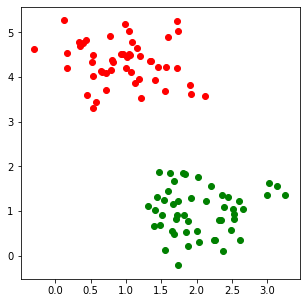

,x,y,distance from 1,distance from 2,closestCentroid
0,3.136885,1.565928,3.512354,2.649228,2
1,1.481533,0.678754,3.682878,0.832214,2
2,0.349872,4.692533,0.715167,4.737354,1
3,0.532377,3.313389,1.099595,3.346224,1
4,2.649282,1.056135,3.678010,1.958457,2
...,...,...,...,...,...
95,-0.300225,4.630597,1.300026,4.809679,1
96,1.733458,-0.214038,4.603898,0.764051,2
97,2.529978,0.941439,3.728636,1.796424,2
98,0.169321,4.197417,0.804235,4.278824,1


In [4]:
kMeansClustering(testSample)